In [132]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import datetime as dt

In [133]:
google_sheet = '1ZlqblM1N8Qqkmy8EP_YSXb9cVtV4z-fKQ7nMWXMLuQc'
data_interviews = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   google_sheet +
                   '/export?gid=0&format=csv',
                    sep=",",
                    on_bad_lines='skip',
                   # Set first column as rownames in data frame
                   index_col=0,
                  )



In [134]:
companies = data_interviews.index
roles = data_interviews['Role'].values.tolist()
y_axis = companies.values.tolist()

statuses = ["Offer", "Withdrawn", "Ghosted", "Rejected", "No Contact"]
colors = [
#     '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#1f77b4',  # muted blue
    '#9467bd',  # muted purple
    '#d62728',  # brick red
    '#bcbd22',  # curry yellow-green
#     '#8c564b',  # chestnut brown
#     '#e377c2',  # raspberry yogurt pink
#     '#7f7f7f',  # middle gray
#     '#bcbd22',  # curry yellow-green
#     '#17becf'  # blue-teal
    ]
statuses_dict = dict(zip(statuses, colors))

interview = ["Personal Screen", "Technical Screen", "Take Home", "ML Screen", "Coding Screen", "On-site"]
markers = [
    'o',  
    's',
    ">",
    "X",
    '*',
    'D'
    ]
interview_dict = dict(zip(interview, markers))

font = {'size': 18, 'family': 'serif', 'serif': ['Times']}
matplotlib.rc('font', **font)
# matplotlib.rc('text', usetex=True)


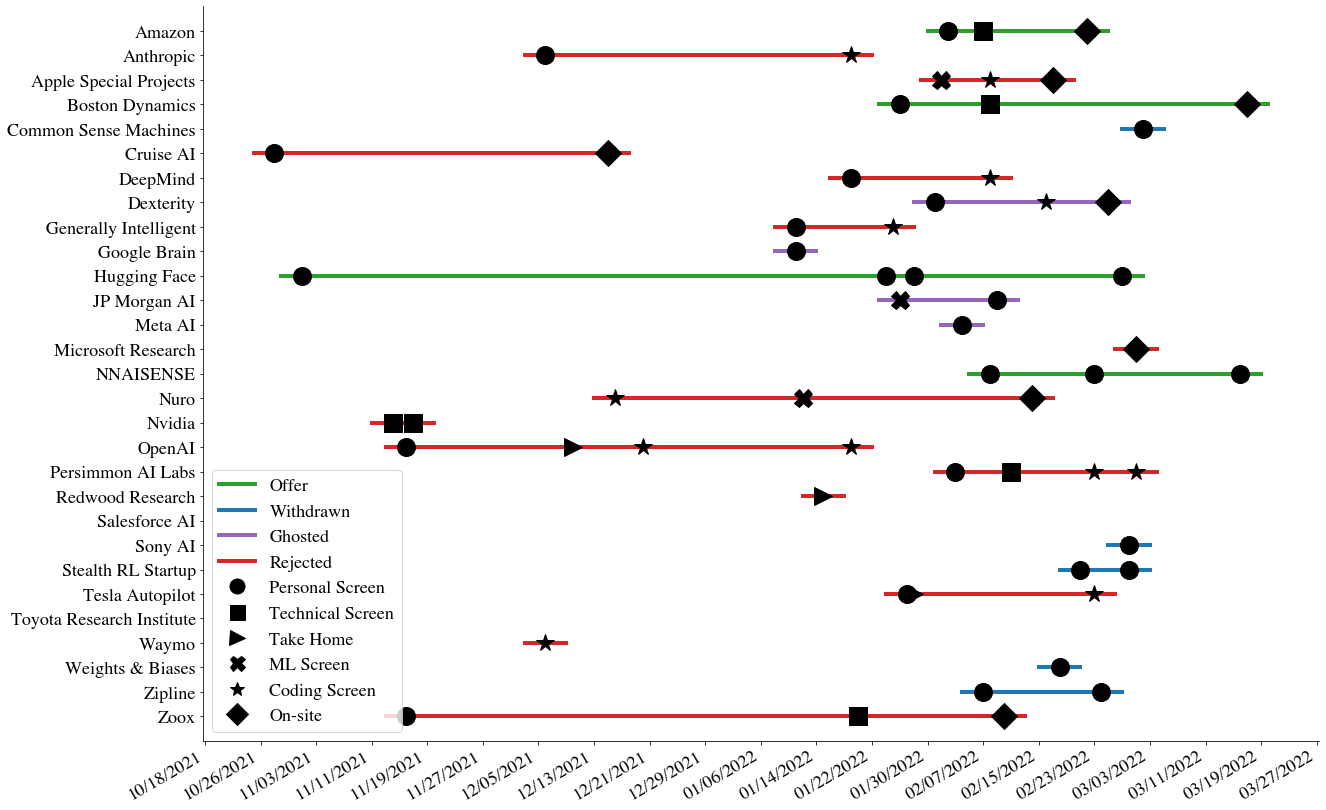

In [136]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_xlabel("Date")
# ax.set_ylabel("Company")
ax.set_ylim([len(companies),-1])
ax.set_yticks(np.arange(len(companies)))
ax.set_yticklabels(companies.values.tolist())
ax.grid(False)
# ax.set_facecolor((1, 1, 1))
    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator())
fig.autofmt_xdate()

for i, comp in enumerate(companies):
    
    # Convert data for row
    data = data_interviews.loc[comp]
    dates = [data["Interview 1 Date"],
             data["Interview 2 Date"],
             data["Interview 3 Date"],
             data["Interview 4 Date"]]
    dates_clean = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in dates if pd.isnull(d) == False]
    types = [data["Interview 1 Format"],
             data["Interview 2 Format"],
             data["Interview 3 Format"],
             data["Interview 4 Format"]]
    types_clean = [t for t in types if pd.isnull(t) == False]

    # filter out companies I had 0 interviews on 
    if len(dates_clean) > 0:
        
        # color / formatting
        color = statuses_dict[data['Status']]
        start = dates_clean[0] - dt.timedelta(days=3)
        end = dates_clean[-1] + dt.timedelta(days=3)
        
        # plot individually for different markers
        ax.plot([start, end], [i, i], c=color,linewidth=4)
        for d, t in zip(dates_clean, types_clean):
            ax.plot(d, i, marker=interview_dict[t], color='k', markersize=18)
    
cur_xticks = ax.get_xticks()
ax.set_xticks(cur_xticks[::8])

# Custom Legend
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], marker=markers[0], lw=0, color='k', markersize=15),
                Line2D([0], [0], marker=markers[1], lw=0, color='k', markersize=15),
                Line2D([0], [0], marker=markers[2], lw=0, color='k', markersize=15),
                Line2D([0], [0], marker=markers[3], lw=0, color='k', markersize=15),
                Line2D([0], [0], marker=markers[4], lw=0, color='k', markersize=15),
                Line2D([0], [0], marker=markers[5], lw=0, color='k', markersize=15),
               ]


ax.legend(custom_lines, ['Offer', 'Withdrawn', 'Ghosted', 'Rejected',
                         "Personal Screen", "Technical Screen", "Take Home", 
                         "ML Screen", "Coding Screen", "On-site"])

ax_histx = fig.add_axes(ax, sharex=ax)